In this mini-project, we will perform data analysis to devise a marketing strategy based on various aspects like area analysis, customer analysis, product category analysis, and sales and profit time series.

In [31]:
#libraries imports
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import numpy as np


#Download and load the US Superstore dataset.
df = pd.read_excel('US Superstore data.xls', header = 0, index_col = 'Row ID')

#Perform an initial data review using .info(), .describe(), and .isnull().sum().
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())

#Data Cleaning and Preprocessing:
#Address any missing values or duplicates.
print(df[df.duplicated() == True])
df.drop_duplicates() # Duplicated records have been identified and removed, ensuring data consistency for analysis.

              Order ID Order Date  Ship Date       Ship Mode Customer ID  \
Row ID                                                                     
1       CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
3       CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
4       US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
5       US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

          Customer Name    Segment        Country             City  \
Row ID                                                               
1           Claire Gute   Consumer  United States        Henderson   
2           Claire Gute   Consumer  United States        Henderson   
3       Darrin Van Huff  Corporate  United States      Los Angeles   
4        Sean O'Donnell   Consumer  United States  Fort Lauderdale   
5        Sean O'Donnell   Consumer  United Stat

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


Which states have the most sales?

In [32]:
top_sales_per_state = df.groupby('State')['Sales'].sum().reset_index().sort_values('Sales', ascending=False).head()
#Add an integer as head argument to change how many "top-sellers" you want.
print(top_sales_per_state) # Top 5 "best-selling" State are California, New York, Texas, Washington, and Pennsylvania

           State        Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140


What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)

In [33]:
print(df[df['State'] == 'New York']['Sales'].sum() >= df[df['State'] == 'California']['Sales'].sum())
print(df[df['State'] == 'New York']['Profit'].sum() >= df[df['State'] == 'California']['Profit'].sum())
#California "beats" New-York in both Sales and Profit.

False
False


Who is an outstanding customer in New York?


In [36]:
top_customer_ny = (
    df[df['State'] == 'New York']                    # Filter to New York
    .groupby('Customer Name')['Sales']               # Group by customer
    .sum()                                           # Sum sales per customer
    .sort_values(ascending=False)                    # Sort by sales
    .reset_index()                                   # Optional: make it a DataFrame
    .iloc[0]                                         # Get the top customer
)

print(top_customer_ny)
#Top customer, customer who generated the most total sales, in New York state is Tom Ashbrook

Customer Name    Tom Ashbrook
Sales               13723.498
Name: 0, dtype: object


Are there any differences among states in profitability?

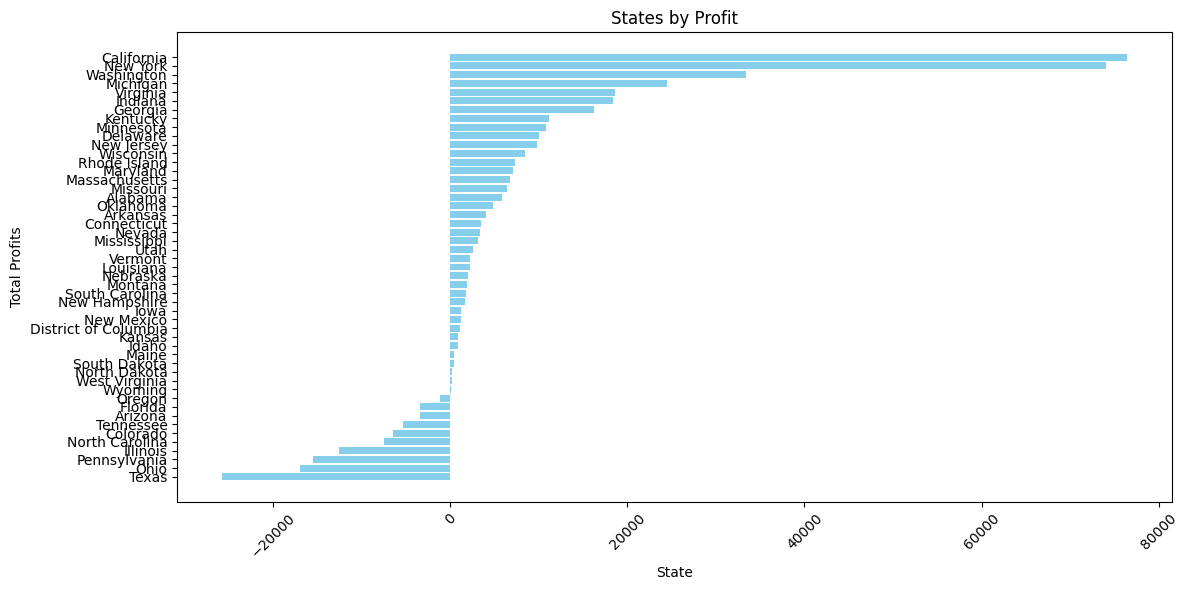

In [37]:
profit_per_state = df.groupby('State')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(profit_per_state['State'], profit_per_state['Profit'], color='skyblue')
plt.gca().invert_yaxis()  # So the top state appears at the top
plt.xticks(rotation=45)
plt.title('States by Profit')
plt.xlabel('State')
plt.ylabel('Total Profits')
plt.tight_layout()
plt.show()

#New York and California make for a significant amount in profits
#Lots of southern states show deficit. Most exemplary is Texas which is the least profitable State despite being top 3rd seller.



The Pareto Principle, also known as the 80/20 rule, is a concept derived from the work of Italian economist Vilfredo Pareto. It states that roughly 80% of the effects come from 20% of the causes. For instance, identifying the top 20% of products that generate 80% of sales or the top 20% of customers that contribute to 80% of profit can help in prioritizing efforts and resources. This focus can lead to improved efficiency and effectiveness in business strategies. Can we apply Pareto principle to customers and Profit ? (Determine if 20% of the customers contribute to 80% of the profit.)

In [39]:
def get_pareto(df, qualitative, quantitative, threshold=80):
    """
    Calculate the entities contributing up to 'threshold'% of the cumulative quantitative value.
    
    Parameters:
        df (pd.DataFrame): Input dataframe
        qualitative (str): Column name of categorical variable (e.g., 'Customer Name')
        quantitative (str): Column name of quantitative variable (e.g., 'Profit')
        threshold (float): Percentage threshold for cumulative sum (default 80)
        
    Returns:
        percent_entities (float): Percentage of entities contributing up to threshold%
        top_entities (list): List of entities contributing up to threshold%
    """
    # Aggregate and sort descending
    agg_df = (
        df.groupby(qualitative)[quantitative]
        .sum()
        .sort_values(ascending=False)
        .reset_index()
    )
    
    # Calculate cumulative percentage
    agg_df['Cumulative Sum'] = agg_df[quantitative].cumsum()
    total_sum = agg_df[quantitative].sum()
    agg_df['Cumulative %'] = 100 * agg_df['Cumulative Sum'] / total_sum
    
    # Select top entities contributing up to threshold%
    top_entities_df = agg_df[agg_df['Cumulative %'] <= threshold]
    
    # Calculate percentage of entities
    percent_entities = 100 * len(top_entities_df) / len(agg_df)
    top_entities = top_entities_df[qualitative].tolist()
    
    return percent_entities, top_entities

pareto_sales_products = get_pareto(df, 'Product ID', 'Sales', 80)
print(f"Top {pareto_sales_products[0]:.1f}% of products contribute approximately 80% of the profit.")
print("List of these Products:")
print(pareto_sales_products[1])
#Pareto for Product Sales

pareto_customers_profits = get_pareto(df, 'Customer ID', 'Profit', 80)
print(f"Top {pareto_sales_customers[0]:.1f}% of customers contribute approximately 80% of the profit.")
print("List of these customers:")
print(pareto_sales_customers[1])
#No Pareto for Customer Profits



Top 22.2% of products contribute approximately 80% of the profit.
List of these Products:
['TEC-CO-10004722', 'OFF-BI-10003527', 'TEC-MA-10002412', 'FUR-CH-10002024', 'OFF-BI-10001359', 'OFF-BI-10000545', 'TEC-CO-10001449', 'TEC-MA-10001127', 'OFF-BI-10004995', 'OFF-SU-10000151', 'TEC-MA-10000822', 'OFF-SU-10002881', 'OFF-BI-10001120', 'FUR-BO-10004834', 'TEC-MA-10001047', 'TEC-PH-10001459', 'TEC-AC-10002049', 'TEC-PH-10002885', 'FUR-TA-10003473', 'FUR-CH-10001215', 'FUR-BO-10002213', 'TEC-CO-10003763', 'FUR-CH-10004287', 'OFF-AP-10002945', 'TEC-AC-10003832', 'TEC-MA-10000418', 'OFF-ST-10000078', 'TEC-AC-10003033', 'FUR-CH-10000454', 'FUR-TA-10000198', 'OFF-ST-10003716', 'FUR-TA-10001889', 'TEC-MA-10000488', 'OFF-ST-10004459', 'FUR-CH-10003973', 'TEC-CO-10001046', 'TEC-CO-10002095', 'TEC-PH-10001817', 'FUR-CH-10001854', 'FUR-CH-10004063', 'FUR-CH-10004086', 'FUR-TA-10001095', 'OFF-ST-10001490', 'TEC-PH-10001530', 'OFF-BI-10003925', 'TEC-MA-10004125', 'OFF-BI-10004600', 'FUR-CH-10003379

What are the Top 20 cities by Sales ? What about the Top 20 cities by Profit ?
Are there any difference among cities in profitability ? (Identify the top 20 cities based on total sales and total profit and analyze differences in profitability among these cities.)

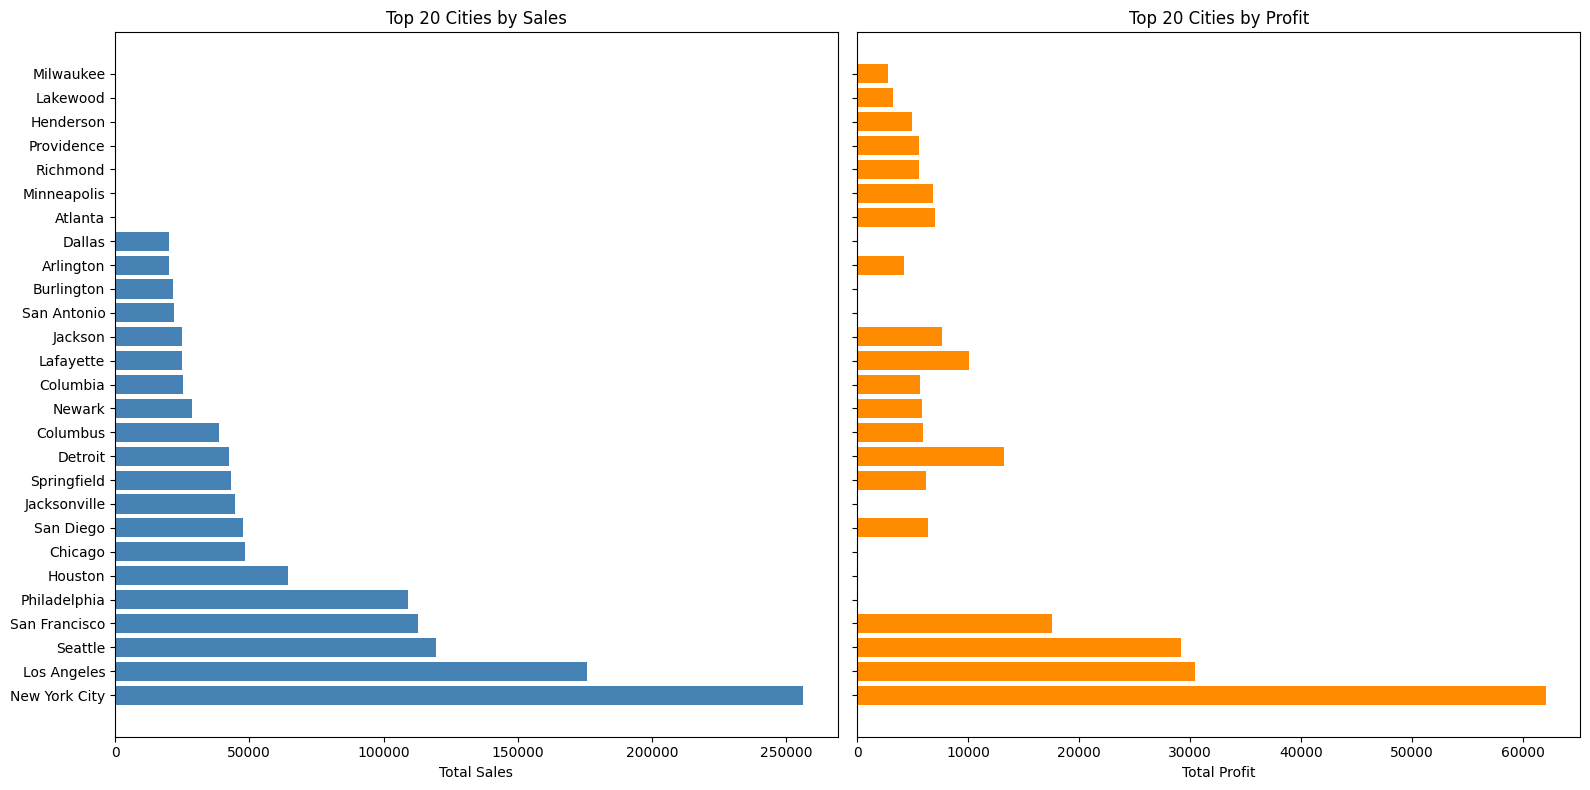

In [40]:
#Extract Top 20 cities by Sales and by Profit
top20_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20).reset_index()
top20_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20).reset_index()

#Plot side-by-side bar charts for clear comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Bar chart: Top 20 cities by Sales
axes[0].barh(top20_sales['City'], top20_sales['Sales'], color='steelblue')
axes[0].invert_yaxis()
axes[0].set_title('Top 20 Cities by Sales')
axes[0].set_xlabel('Total Sales')

# Bar chart: Top 20 cities by Profit
axes[1].barh(top20_profit['City'], top20_profit['Profit'], color='darkorange')
axes[1].invert_yaxis()
axes[1].set_title('Top 20 Cities by Profit')
axes[1].set_xlabel('Total Profit')

plt.tight_layout()
plt.show()

#Analysis of profitability differences
#I am not sure we can infer a correlation between Sales and Profit. It needs to be further tested, maybe with a an ANOVA (Analysis Of Variance).


What are the Top 20 customers by Sales?

In [42]:
# Step 1: Aggregate total sales by Customer ID
top_customers = df.groupby('Customer ID')['Sales'].sum().reset_index()

# Step 2: Sort descending by total sales and pick top 20
top20_customers = top_customers.sort_values('Sales', ascending=False).head(20)

# Step 3: Get unique Customer ID & Name mapping
customer_names = df[['Customer ID', 'Customer Name']].drop_duplicates()

# Step 4: Merge to get Customer Name
top20_customers = top20_customers.merge(customer_names, on='Customer ID', how='left')

# Step 5: Print Customer Names with total sales
print(top20_customers[['Customer ID', 'Customer Name', 'Sales']])


   Customer ID       Customer Name      Sales
0     SM-20320         Sean Miller  25043.050
1     TC-20980        Tamara Chand  19052.218
2     RB-19360        Raymond Buch  15117.339
3     TA-21385        Tom Ashbrook  14595.620
4     AB-10105       Adrian Barton  14473.571
5     KL-16645        Ken Lonsdale  14175.229
6     SC-20095        Sanjit Chand  14142.334
7     HL-15040        Hunter Lopez  12873.298
8     SE-20110        Sanjit Engle  12209.438
9     CC-12370  Christopher Conant  12129.072
10    TS-21370        Todd Sumrall  11891.751
11    GT-14710           Greg Tran  11820.120
12    BM-11140        Becky Martin  11789.630
13    SV-20365         Seth Vernon  11470.950
14    CJ-12010     Caroline Jumper  11164.974
15    CL-12565         Clay Ludtke  10880.546
16    ME-17320       Maria Etezadi  10663.728
17    KF-16285      Karen Ferguson  10604.266
18    BS-11365        Bill Shonely  10501.653
19    EH-13765        Edward Hooks  10310.880


Plot the Cumulative curve in Sales by Customers. Can we apply Pareto principle to customers and Sales ?

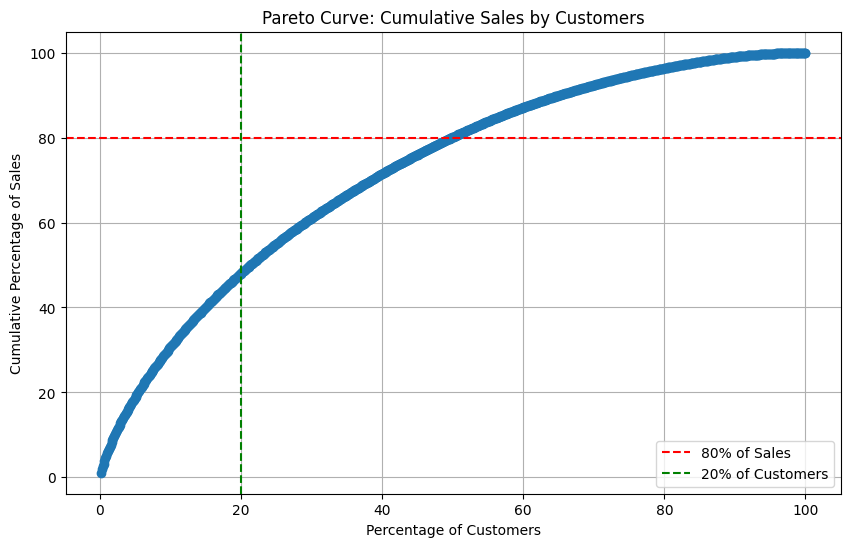

Top 49.8% of customers contribute approximately 80% of the sales.
List of these customers:
['SM-20320', 'TC-20980', 'RB-19360', 'TA-21385', 'AB-10105', 'KL-16645', 'SC-20095', 'HL-15040', 'SE-20110', 'CC-12370', 'TS-21370', 'GT-14710', 'BM-11140', 'SV-20365', 'CJ-12010', 'CL-12565', 'ME-17320', 'KF-16285', 'BS-11365', 'EH-13765', 'JL-15835', 'GT-14635', 'HW-14935', 'TB-21400', 'PF-19120', 'CM-12385', 'JD-16150', 'JE-15715', 'LA-16780', 'PK-19075', 'DR-12940', 'NF-18385', 'KD-16270', 'NC-18535', 'HM-14860', 'KD-16495', 'SB-20290', 'ZC-21910', 'JH-15985', 'NP-18700', 'AH-10690', 'AB-10060', 'JE-15610', 'JW-15220', 'LC-16885', 'JM-15865', 'JD-15895', 'PO-18850', 'MS-17365', 'RW-19540', 'BM-11650', 'PP-18955', 'NW-18400', 'Dp-13240', 'FH-14365', 'RH-19510', 'PS-19045', 'BB-11545', 'JE-15745', 'YS-21880', 'AR-10540', 'DR-12880', 'GK-14620', 'JA-15970', 'NM-18445', 'VD-21670', 'SB-20185', 'JG-15160', 'DM-13015', 'CM-12655', 'MJ-17740', 'BH-11710', 'RL-19615', 'WB-21850', 'VW-21775', 'SD-2048

In [47]:
# Aggregate total sales per customer, sorted descending
customer_sales = (
    df.groupby('Customer ID')['Sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Calculate cumulative sum and cumulative percentage of total sales
customer_sales['Cumulative Sales'] = customer_sales['Sales'].cumsum()
total_sales = customer_sales['Sales'].sum()
customer_sales['Cumulative Sales %'] = 100 * customer_sales['Cumulative Sales'] / total_sales

# Calculate customer percentage (x-axis)
customer_sales['Customer Rank %'] = 100 * (np.arange(len(customer_sales)) + 1) / len(customer_sales)

plt.figure(figsize=(10, 6))
plt.plot(customer_sales['Customer Rank %'], customer_sales['Cumulative Sales %'], marker='o')

# Add reference lines for 80% sales and 20% customers
plt.axhline(y=80, color='r', linestyle='--', label='80% of Sales')
plt.axvline(x=20, color='g', linestyle='--', label='20% of Customers')

plt.title('Pareto Curve: Cumulative Sales by Customers')
plt.xlabel('Percentage of Customers')
plt.ylabel('Cumulative Percentage of Sales')
plt.legend()
plt.grid(True)
plt.show()

pareto_customers_sales = get_pareto(df, 'Customer ID', 'Sales', 80)
print(f"Top {pareto_customers_sales[0]:.1f}% of customers contribute approximately 80% of the sales.")
print("List of these customers:")
print(pareto_customers_sales[1])
#No Pareto for Customer Sales



Based on the analysis, make decisions on which states and cities to prioritize for marketing strategies.

In [ ]:
#For states, I would priritize California, New York and Washington with a focus on New York City, San Francisco, Los Angeles and Seattle 
#since they show great results in both Sales and Profits.